The purpose of this code is to explain and visualize car price data.

In [252]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Reading the data file
data = pd.read_csv('car_prices.csv')

In [3]:
# Checking the dimensions of the dataset
data.shape

(558837, 16)

In [253]:
# Checking columns and missing values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550199 entries, 0 to 558836
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          550199 non-null  int64  
 1   make          550199 non-null  object 
 2   model         550199 non-null  object 
 3   trim          550199 non-null  object 
 4   body          550199 non-null  object 
 5   transmission  550199 non-null  object 
 6   vin           550199 non-null  object 
 7   state         550199 non-null  object 
 8   condition     550199 non-null  float64
 9   odometer      550199 non-null  float64
 10  color         550199 non-null  object 
 11  interior      550199 non-null  object 
 12  seller        550199 non-null  object 
 13  mmr           550199 non-null  float64
 14  sellingprice  550199 non-null  float64
 15  sale_month    550199 non-null  object 
 16  sale_year     550199 non-null  int64  
 17  car_age       550199 non-null  int64  
dtypes: float6

In [5]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Data Cleaning 

In [6]:
# Checking for duplicated data
data.duplicated().any()

False

In [7]:
# Checking for duplicated 'vin' column data
data.duplicated('vin').sum()

8539

In [8]:
# Show duplicated data 
data[data.duplicated('vin')].sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
260528,2004,Jeep,Liberty,Sport,SUV,automatic,1j4gk48k84w252971,fl,22.0,102894.0,green,gray,pompano ford lincoln mercury,3975.0,3900.0,Fri Feb 06 2015 01:35:00 GMT-0800 (PST)
123767,2012,Chevrolet,Impala,LT Fleet,Sedan,automatic,2g1wg5e37c1268650,tx,37.0,63315.0,silver,gray,music city autoplex llc,9050.0,9500.0,Wed Jan 21 2015 02:20:00 GMT-0800 (PST)
285706,2011,Cadillac,CTS,Luxury,Sedan,automatic,1g6de5eyxb0148046,tx,37.0,56791.0,white,tan,music city autoplex llc,15450.0,17750.0,Wed Feb 18 2015 02:20:00 GMT-0800 (PST)
210028,2012,Jeep,Liberty,Sport,SUV,NaN,1c4pjmak5cw100227,nc,45.0,35486.0,black,black,medlin buick gmc mazda,15000.0,15900.0,Tue Jan 27 2015 01:15:00 GMT-0800 (PST)
287411,2008,BMW,3 Series,328i,Sedan,automatic,wbava33558kx85513,ca,33.0,130984.0,black,black,coast sports cars inc,7150.0,7500.0,Wed Feb 11 2015 04:15:00 GMT-0800 (PST)


In [9]:
# Investigating duplicated data
data[data['vin']== '2g1wf5e35d1156286']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
81449,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e35d1156286,ca,35.0,25730.0,black,black,advantage rent a car/hertz,10700.0,9800.0,Wed Jan 07 2015 12:30:00 GMT-0800 (PST)
132820,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e35d1156286,ca,39.0,25740.0,black,black,ecars,10650.0,10800.0,Tue Jan 13 2015 12:30:00 GMT-0800 (PST)


In this specific column, we observed that some cars have been sold multiple times. It seems that some companies buy these cars and then resell them. 

In [10]:
# Removing duplicated data from the dataset
data.drop_duplicates(subset=['vin'],keep='last',inplace=True)

In [11]:
# Checking for duplicated data
data.duplicated('vin').any()

False

In [12]:
# Checking for missing values
data.isna().sum()

year                0
make            10167
model           10265
trim            10501
body            12988
transmission    64272
vin                 1
state               0
condition       11506
odometer           83
color             727
interior          727
seller              0
mmr                14
sellingprice       12
saledate           12
dtype: int64

In [254]:
# Investigating missing values
data[data['body'].isna()].sample(5)

ValueError: a must be greater than 0 unless no samples are taken

In [14]:
# Filling missing values with 'other' or a specific number
data['make'].fillna('other',inplace=True)
data['model'].fillna('other',inplace=True)
data['trim'].fillna('other',inplace=True)
data['body'].fillna('other',inplace=True)
data['transmission'].fillna('other',inplace=True)
data['color'].fillna('other',inplace=True)
data['interior'].fillna('other',inplace=True)


In [15]:
# Investigating missing values in the 'mmr' column
data[data['mmr'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
306447,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac6dh687932,il,19.0,37254.0,gray,gray,kfl llc,NaN,NaN,NaN
406524,2013,Chrysler,300,Base,Sedan,automatic,2c3ccaag9dh723146,il,27.0,44208.0,silver,black,kfl llc,NaN,NaN,NaN
422358,2013,Hyundai,Sonata,GLS,Sedan,other,5npeb4ac3dh735368,az,28.0,44299.0,blue,gray,kfl llc,NaN,NaN,NaN
429644,2013,Chrysler,200,Touring,Sedan,automatic,1c3ccbbb9dn718531,il,25.0,47344.0,white,black,kfl llc,NaN,NaN,NaN
429660,2013,Dodge,Avenger,SXT,Sedan,automatic,1c3cdzcg5dn741076,il,34.0,44525.0,gray,black,kfl llc,NaN,NaN,NaN
429786,2013,Hyundai,Accent,GLS,Sedan,automatic,kmhct4ae7du450468,il,3.0,43135.0,silver,gray,kfl llc,NaN,NaN,NaN
431905,2013,Kia,Soul,Base,Wagon,automatic,kndjt2a5xd7765280,va,19.0,29465.0,silver,black,kfl llc,NaN,NaN,NaN
457035,2014,Hyundai,Elantra,SE,Sedan,automatic,5npdh4ae3eh504144,il,19.0,20775.0,white,—,kfl llc,NaN,NaN,NaN
457803,2013,Dodge,Charger,SE,Sedan,automatic,2c3cdxbg6dh688757,il,19.0,45355.0,white,black,kfl llc,NaN,NaN,NaN
522495,2012,Ford,Fusion,SEL,sedan,automatic,3fahp0jg5cr241590,va,26.0,51648.0,black,gray,kfl llc,NaN,NaN,NaN


its looks like 'kfl llc' seller dont wanna give their data. we cant fill this data its wont be normal. 

In [16]:
# Removing rows with missing 'seller' data as 'kfl llc' seems to have withheld it
data.drop(data[data['seller']=='kfl llc'].index,inplace=True)

In [17]:
# Removing invalid data in the 'mmr' column
data.drop(data[data['mmr'].isna()].index,inplace=True)

In [18]:
# Removing data with very low selling prices
data[data['sellingprice'] < 100]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,41.0,31886.0,white,gray,u-haul,20800.0,1.0,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,other,4s2cm58v9s4375559,va,1.0,254132.0,red,gray,automotive remarketing inc,375.0,1.0,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)


In [19]:
data.drop(data[data['sellingprice'] < 100].index,inplace=True)

In [20]:
# Investigating missing values in the 'odometer' column
data[data['odometer'].isna()].head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
3360,2007,Ford,Edge,SEL,SUV,other,2fmdk38c77bb39171,ca,32.0,NaN,gray,—,valley kia,2775.0,15500.0,Thu Jun 18 2015 05:00:00 GMT-0700 (PDT)
4301,2005,Nissan,Murano,SL,SUV,other,jn8az08t75w326816,ca,NaN,NaN,black,—,long beach bmw & long beach mini,4900.0,400.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
5119,2000,Mercedes-Benz,M-Class,ML320,SUV,automatic,4jgab54e5ya217238,ca,26.0,NaN,white,beige,cig financial,2050.0,1500.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST)
5219,1998,dodge,caravan,other,other,other,2b4fp25b6wr663533,ca,NaN,NaN,green,—,rock honda,675.0,300.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
5222,1995,Honda,Accord,LX,Sedan,other,jhmcd5633sc041707,ca,NaN,NaN,gold,—,rock honda,675.0,400.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)


In [256]:
# An example where the odometer value is missing. Filtering by year, make, and model:
data[(data['year'] == 1998) & (data['make'] == 'dodge') & (data['model'] == 'caravan')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_month,sale_year,car_age
5181,1998,dodge,caravan,other,other,automatic,2b4fp25b4wr591568,ca,28.00,240737.0,brown,brown,south coast subaru,500.0,500.0,Dec,2014,16
5220,1998,dodge,caravan,se,other,automatic,2b4gp45g6wr755608,ca,10.40,165255.0,green,—,lithia chrysler jeep dodge,400.0,250.0,Dec,2014,16
29573,1998,dodge,caravan,other,other,automatic,2b4fp25b9wr714541,ne,20.32,177903.0,burgundy,gray,woodhouse ford inc,650.0,500.0,Dec,2014,16
29593,1998,dodge,caravan,other,other,automatic,2b4fp25b3wr734283,ga,25.59,116625.0,white,tan,nabors used cars,725.0,1300.0,Dec,2014,16


In [22]:
data.drop(data[data['odometer'].isna()].index,inplace=True)

In [23]:
data.isna().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11448
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [24]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,550199.000000,538751.000000,550199.000000,550199.000000,550199.000000
mean,2010.044982,30.694553,68326.084299,13761.887653,13612.063980
std,3.973632,13.408249,53543.676927,9682.683543,9754.392018
min,1982.000000,1.000000,1.000000,25.000000,100.000000
25%,2007.000000,23.000000,28287.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52094.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99236.500000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550199 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          550199 non-null  int64  
 1   make          550199 non-null  object 
 2   model         550199 non-null  object 
 3   trim          550199 non-null  object 
 4   body          550199 non-null  object 
 5   transmission  550199 non-null  object 
 6   vin           550199 non-null  object 
 7   state         550199 non-null  object 
 8   condition     538751 non-null  float64
 9   odometer      550199 non-null  float64
 10  color         550199 non-null  object 
 11  interior      550199 non-null  object 
 12  seller        550199 non-null  object 
 13  mmr           550199 non-null  float64
 14  sellingprice  550199 non-null  float64
 15  saledate      550199 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.4+ MB


In [26]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
ml_data = data.copy()

Filling missing values using machine learning


In [28]:
# Converting categorical data to numerical data using LabelEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_encoder = LabelEncoder()
colums_encode = ['make', 'model', 'trim', 'body', 'transmission', 'state',
                'color', 'interior']

for vlue in colums_encode:
    ml_data[f'encode_{vlue}'] = label_encoder.fit_transform(ml_data[vlue])

# for ml what we wont use or what we make encode delete they
ml_data.drop(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller','saledate'],axis=1,inplace=True)


In [29]:
#  Removing missing values for model training
missing_values = ml_data[ml_data['condition'].isna()]
ml_data.dropna(inplace=True)

In [31]:
#Splitting the data into training and testing sets
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X = ml_data.drop('condition',axis=1)
y = ml_data['condition']

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state=42)

In [32]:
# Training the model using Random Forest Regressor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
# Evaluating the model's performance
y_prediction = model.predict(X_test)
mse = mean_squared_error(y_test,y_prediction)
print(mse)


116.16154866404953


In [34]:
# Filling missing values using the trained model
get_missing = model.predict(missing_values.drop('condition',axis=1))
data.loc[missing_values.index,'condition'] = get_missing

In [35]:
#data.isna().any()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550199 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          550199 non-null  int64  
 1   make          550199 non-null  object 
 2   model         550199 non-null  object 
 3   trim          550199 non-null  object 
 4   body          550199 non-null  object 
 5   transmission  550199 non-null  object 
 6   vin           550199 non-null  object 
 7   state         550199 non-null  object 
 8   condition     550199 non-null  float64
 9   odometer      550199 non-null  float64
 10  color         550199 non-null  object 
 11  interior      550199 non-null  object 
 12  seller        550199 non-null  object 
 13  mmr           550199 non-null  float64
 14  sellingprice  550199 non-null  float64
 15  saledate      550199 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 87.5+ MB


In [37]:
# Adding new columns
data['saledate'] = data['saledate'].str.split(' ')
data['sale_month'] = data['saledate'].str[1]
data['sale_year'] = data['saledate'].str[3]
data.drop('saledate',axis=1,inplace=True)

In [38]:
data['sale_year'] = pd.to_numeric(data['sale_year'])

In [39]:
# see is there any relation using pairplot graph 
#sns.pairplot(data.sample(10000),hue='condition')

In [40]:
# Adding a new column to show the age of the car
data['car_age'] = data['sale_year'] - data['year']
data.loc[data['car_age'] == -1, 'car_age'] = 0

In [41]:
clean_data = data.copy()

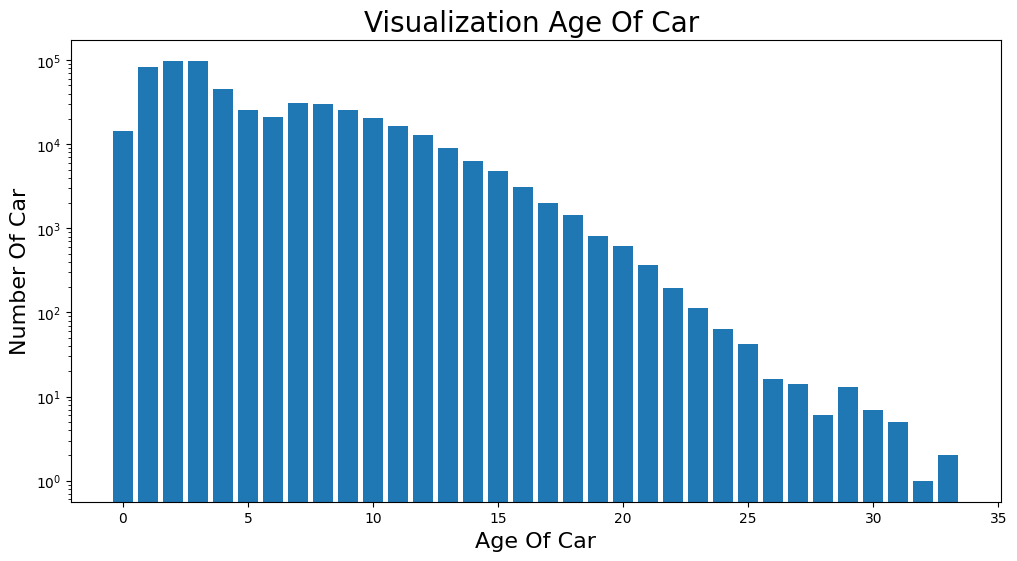

In [42]:
# Visualizing the age of cars
age_count = data.groupby('car_age',as_index=False)['year'].count()


plt.figure(figsize=(12,6))

plt.bar(x=age_count['car_age'],height=age_count['year'],log=True)
plt.xlabel('Age Of Car',fontsize=16)
plt.ylabel('Number Of Car',fontsize=16)
plt.title('Visualization Age Of Car ',fontsize=20)
plt.show()

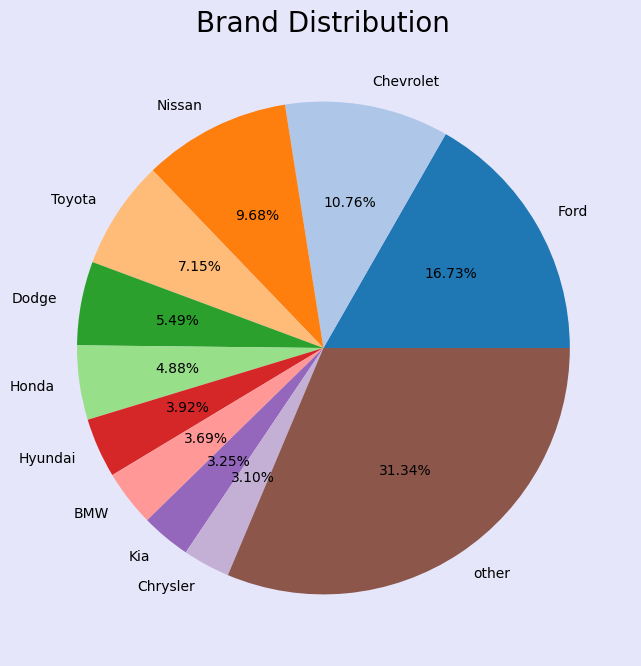

In [45]:
# Visualizing brand distribution
brand_car = data.groupby('make',as_index=False)['model'].count().sort_values('model',ascending=False)

top_10 = brand_car.head(10)

other_total = brand_car.iloc[10:]['model'].sum()

other_data = pd.DataFrame({'make': ['other'], 'model': [other_total]})

combin_data = pd.concat([top_10, other_data])

fig, ax = plt.subplots(figsize =(12, 8),facecolor = 'lavender') 

ax.pie(x=combin_data['model'],labels=combin_data['make'], autopct='%1.2f%%',colors=plt.cm.tab20.colors)

plt.title('Brand Distribution',fontsize=20)

#ax.set_facecolor('lavender')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


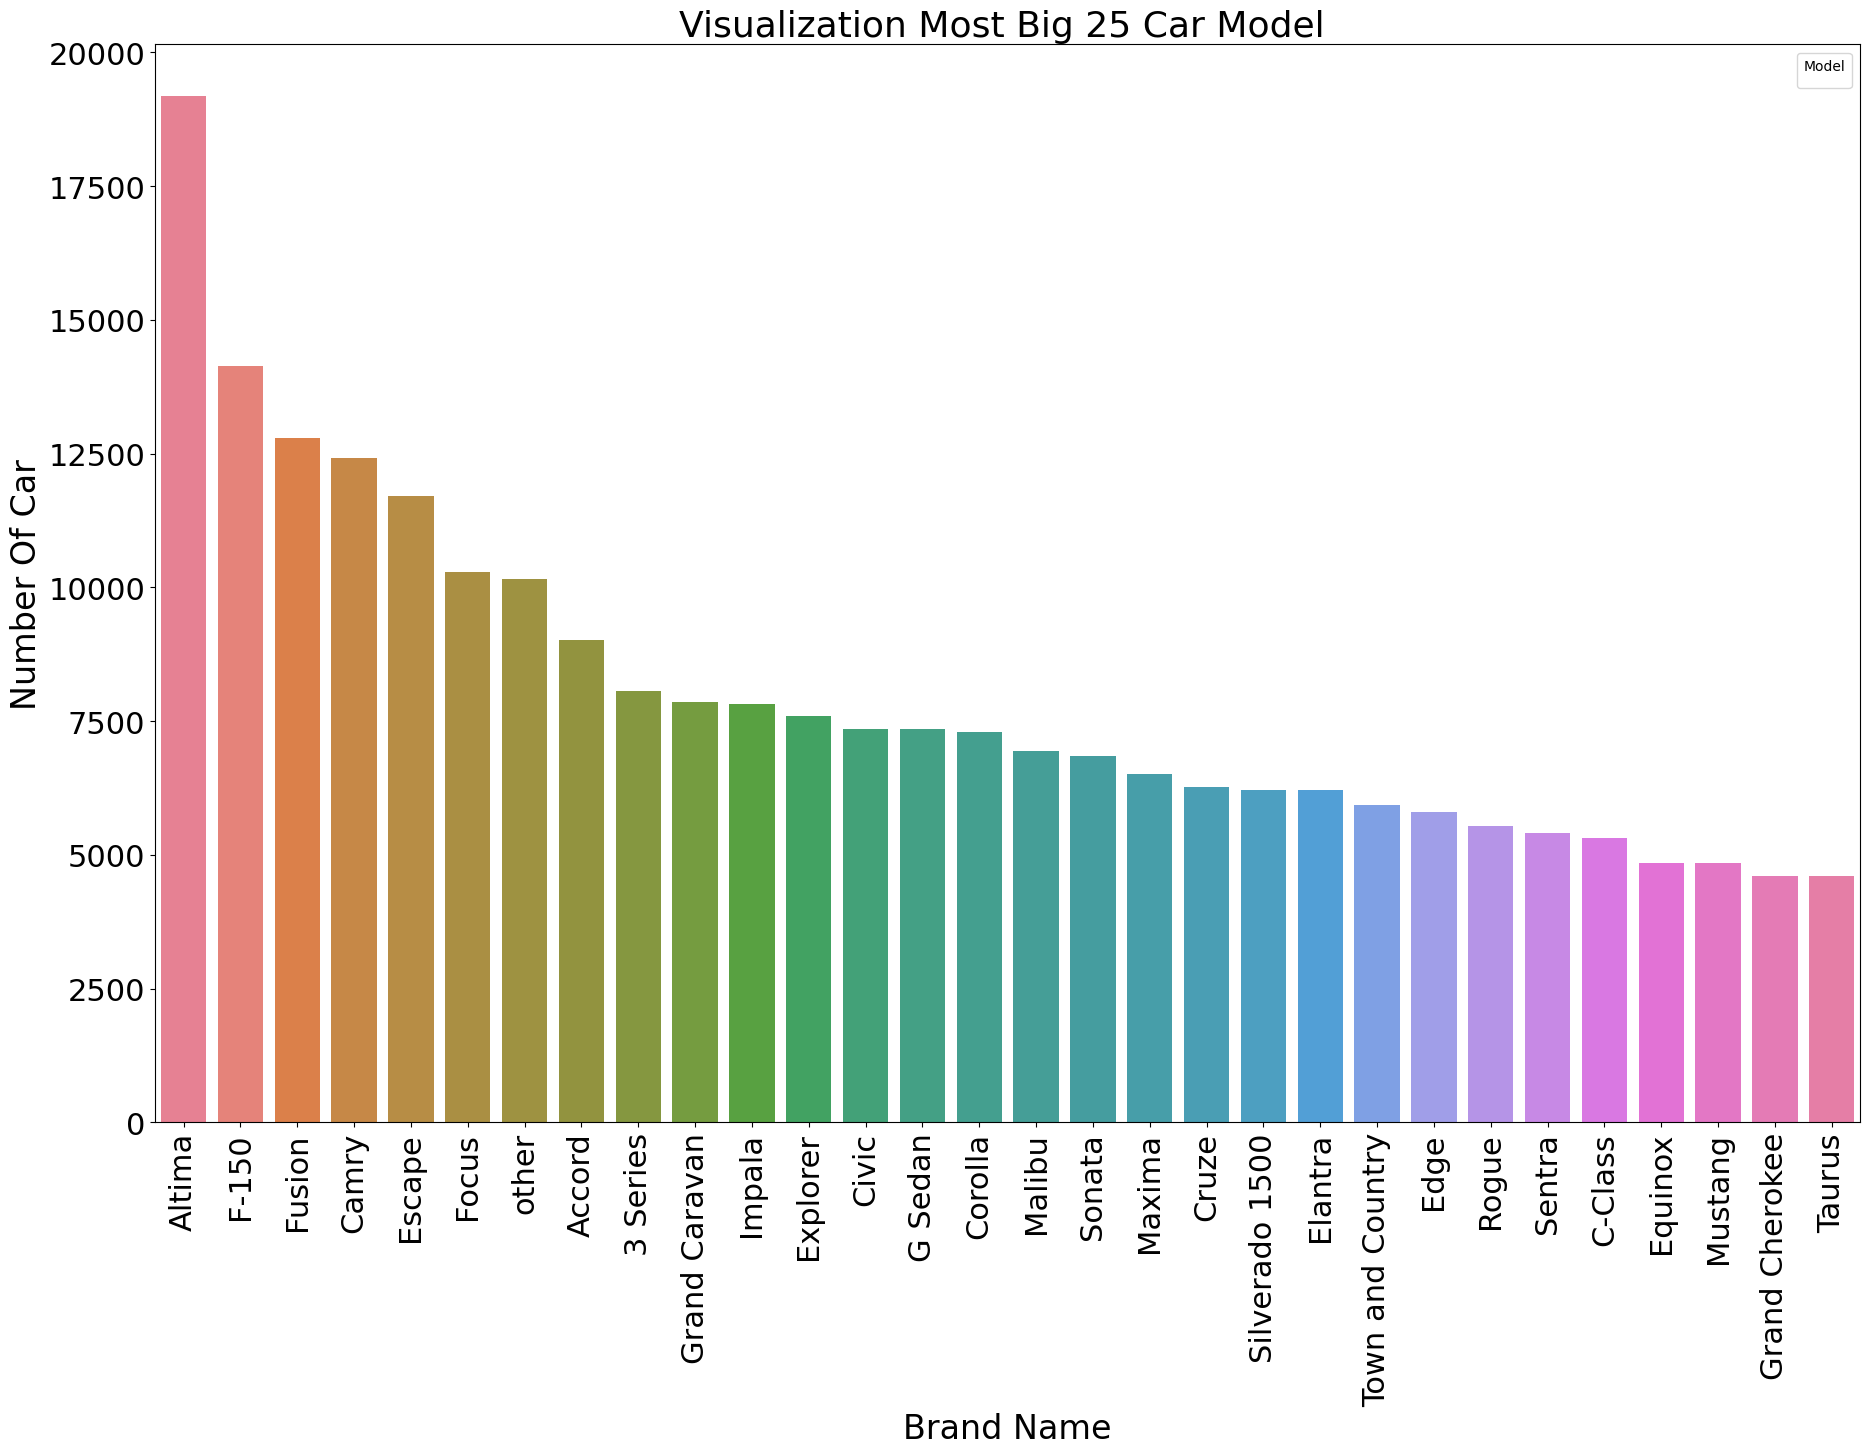

In [144]:
# Visualization of car models
model_n = data.groupby(['make','model'],as_index=False).count().sort_values('year',ascending=False)
model_n.head(10)

plt.figure(figsize=(22,14))

sns.barplot(data=model_n.head(30), x='model',y='year', hue='model')

plt.xlabel('Brand Name',fontsize=24)
plt.ylabel('Number Of Car',fontsize=24)
plt.title('Visualization Most Big 25 Car Model ',fontsize=26)
plt.xticks(rotation=90 , fontsize=22)
plt.yticks(fontsize=22)
plt.legend(title='Model', fontsize=12, loc='upper right')

plt.show()

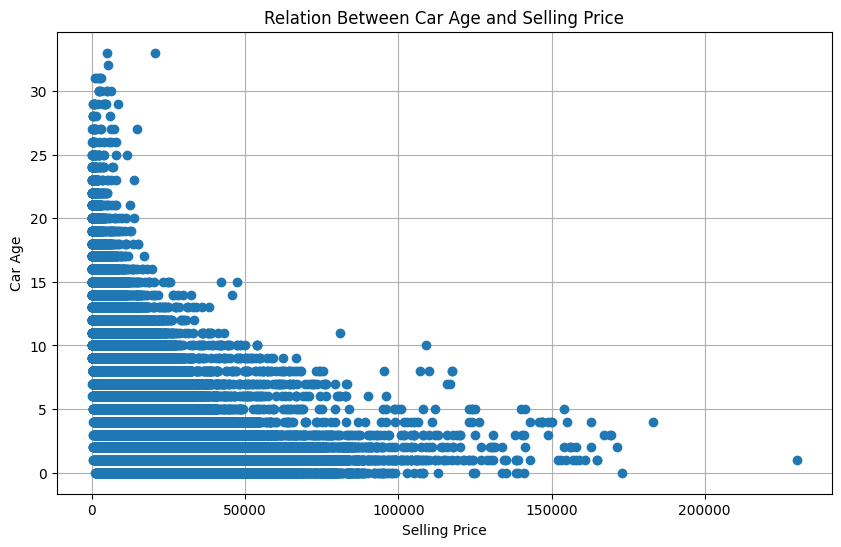

In [195]:
# Visualization of the relationship between car age and car price:
plt.figure(figsize=(10, 6))
plt.plot(data['sellingprice'],data['car_age'],'o')
plt.xlabel('Selling Price')
plt.ylabel('Car Age')
plt.title('Relation Between Car Age and Selling Price')
plt.grid(True)
plt.show()

In [247]:
# Explanation and visualization of mean prices of car models:
model_price = data.groupby(['make'],as_index=False)['sellingprice'].mean()
model_price.sort_values('sellingprice',ascending=False,inplace=True)


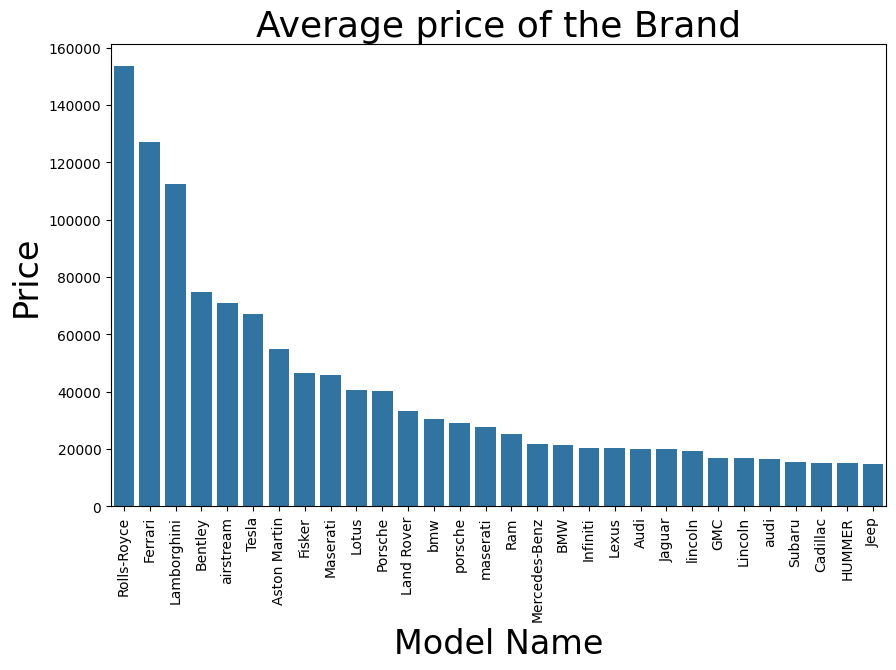

In [250]:
#Average price of the Brand
plt.figure(figsize=(10, 6))
sns.barplot(x=model_price['make'].head(30),y=model_price['sellingprice'].head(30))
plt.xlabel('Model Name',fontsize=24)
plt.ylabel('Price',fontsize=24)
plt.title('Average price of the Brand',fontsize=26)
plt.xticks(rotation=90)
#plt.yticks(fontsize=22)
plt.show()